In [2]:
import pandas as pd

In [3]:
# Uploading files from the local system
from google.colab import files
files.upload()

Saving teams.csv to teams.csv


{'teams.csv': b"team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals\nAFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0\nAFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0\nAFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0\nAFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0\nAFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0\nAFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.0,0.0\nAFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3\nAFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7\nAHO,Netherlands Antilles,1964,4,4,28.5,171.2,69.4,0,0.0,0.0\nAHO,Netherlands Antilles,1968,4,5,31.0,173.2,67.8,0,0.0,0.0\nAHO,Netherlands Antilles,1972,2,2,38.5,164.0,86.0,0,0.0,0.0\nAHO,Netherlands Antilles,1976,4,4,27.3,174.5,66.0,0,0.0,0.0\nAHO,Netherlands Antilles,1984,10,13,18.2,181.1,69.8,0,0.0,0.0\nAHO,Netherlands Antilles,1988,4,4,25.0,193.0,80.0,1,0.0,0.0\nAHO,Netherlands Antilles,1992,4,4,30.2,178.0,83.5,0,1.0,0.3\nAHO,Netherlands Antilles,1996,7,7,30.1,178.0,83.2,0

In [4]:
# Load Dataset
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
# Keeping only necessary columns
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [6]:
teams.corr(numeric_only=True)["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


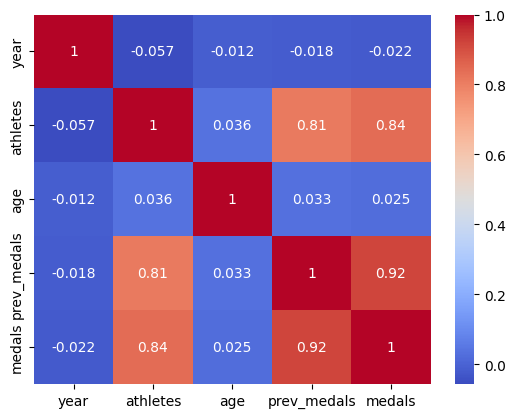

In [7]:
# Heatmap to show how strongly one category is correlated to another
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(teams.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Remove rows having NaN/Missing Values
teams = teams.dropna()

In [30]:
# Splitting the data into training and testing sets based on year
# Training set = Data before 2012
# Testing set = Data from 2012 and later
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()
train = train.dropna()
test = test.dropna()




In [31]:
from sklearn.linear_model import LinearRegression
# Creating a Linear Regression Model
reg = LinearRegression()
# Training the model
reg.fit(train[["prev_medals"]], train["medals"])

LinearRegression()

In [32]:
# Making Predicitions
pred = reg.predict(test[["prev_medals"]])

In [33]:
pred

array([  2.09113425,   2.09113425,   1.10693025,   1.10693025,
         3.07533825,   2.09113425,   1.10693025,   1.10693025,
         1.10693025,   1.10693025,   1.10693025,   1.10693025,
        51.30133431,  19.80680627,   7.01215425,   4.05954225,
         1.10693025,   1.10693025,   1.10693025,   1.10693025,
       147.75332642, 113.30618638,   4.05954225,   1.10693025,
         7.99635826,  10.94897026,   7.99635826,   5.04374625,
         1.10693025,   1.10693025,   1.10693025,   1.10693025,
         1.10693025,   1.10693025,   6.02795025,   4.05954225,
         1.10693025,   1.10693025,   1.10693025,   1.10693025,
         1.10693025,   1.10693025,   1.10693025,   1.10693025,
         1.10693025,   1.10693025,  29.64884628,  23.74362227,
         1.10693025,   1.10693025,   1.10693025,   2.09113425,
        77.87484234,  59.17496632,   1.10693025,   2.09113425,
         1.10693025,   1.10693025,   6.02795025,   3.07533825,
         1.10693025,   1.10693025,   1.10693025,   1.10

In [34]:
# Rounding off the predictions and adding to the testing set
import numpy as np
test["pred"] = np.round(pred).astype(int)
test


,team,country,year,athletes,age,prev_medals,medals,pred
6,AFG,Afghanistan,2012,6,24.8,1.0,1,2
7,AFG,Afghanistan,2016,3,24.7,1.0,0,2
24,ALB,Albania,2012,10,25.7,0.0,0,1
25,ALB,Albania,2016,6,23.7,0.0,0,1
37,ALG,Algeria,2012,39,24.8,2.0,1,3
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,1
2131,ZAM,Zambia,2012,7,22.6,0.0,0,1
2132,ZAM,Zambia,2016,7,24.1,0.0,0,1
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,5


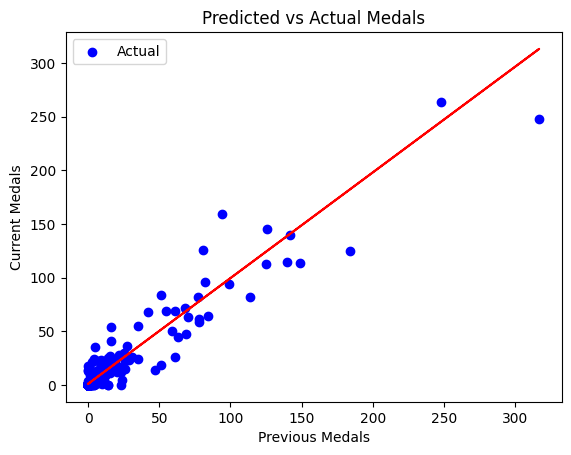

In [35]:
# Visualizing how well the model predicts medals with a graph
# Blue dots represent actual medal counts from test data
# The Red line represents predicted medal counts based on previous medals
import matplotlib.pyplot as plt
plt.scatter(test["prev_medals"], test["medals"], color='blue', label='Actual')
plt.plot(test["prev_medals"], pred, color='red')
plt.xlabel("Previous Medals")
plt.ylabel("Current Medals")
plt.legend()
plt.title("Predicted vs Actual Medals")
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, r2_score
# Calculating Average error in predictions
mse = mean_absolute_error(test["medals"], pred)
print(f'Mean Absolute Error: {mse}')
# Calculating R^2 score to measure model's accuracy
r2 = r2_score(test["medals"], pred)
print(f"R² Score: {r2}")


Mean Absolute Error: 4.0184055371600165
R² Score: 0.899624456956699


In [37]:
# Optional: Asking user to enter country's name and get the actual and predicted value of medals
country_name = input("Enter country name")
if country_name in test["country"].values:
  row = test[test["country"] == country_name].iloc[0]
  print(f"\n Country: {country_name}")
  print(f"Actual medals: {row['medals']}")
  print(f"Predicted medals: {row['pred']}")
else:
  print("Country not found in test set.")


Enter country nameIndia

 Country: India
Actual medals: 6
Predicted medals: 4
